<a href="https://colab.research.google.com/github/mustafiz-ahsan/Image-Processing-CSE428-/blob/main/A1_22101485_22101486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

Max collaborators = 2

In [ ]:
COLLABORATORS_NAME = "Prachurja Bhattacharjee, Mustafis Ahsan"
COLLABORATORS_ID = "22101485, 22101486"

# **Part 1 [15 Marks]**

In this part, you will work with point processing, HE, AHE, and CLAHE.

In [ ]:
import numpy as np
from skimage import io, color, exposure, transform, img_as_float
import matplotlib.pyplot as plt


In [ ]:
### If you need helper functions defined, define here -

### Code ends

## Task 1 - Basic Image Operation

Import any photograph taken by you (RGB) (`sample_1.jpeg`/`sample_1.jpg`) as a numpy array, save it in the variable `I`.

A picture taken from your phone of any scenary/streets/building is better.

Remember - your image name MUST be `sample_1.jpeg`/`sample_1.jpg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [ ]:
I = io.imread("/content/sample_1.jpg")

# find the height and the width of the image
height, width, channel = I.shape
H = height # should contain height
W = width # should contain width
print("Height is", H)
print("Width is", W)

Height is 986
Width is 960


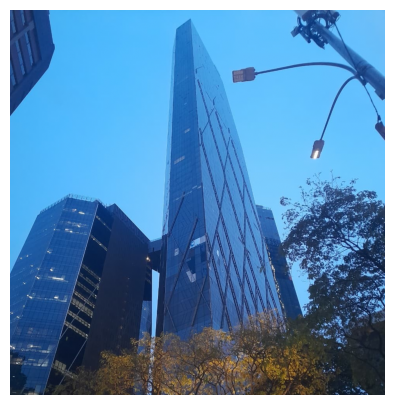

In [ ]:
I = img_as_float(I) # Replace none and normalize the image so that the pixel values of each channel are between 0 and 1
I2= I.copy()
### Write a code to display the image -
plt.figure(figsize=(5, 5))
plt.imshow(I)
plt.axis("off");
### Code ends

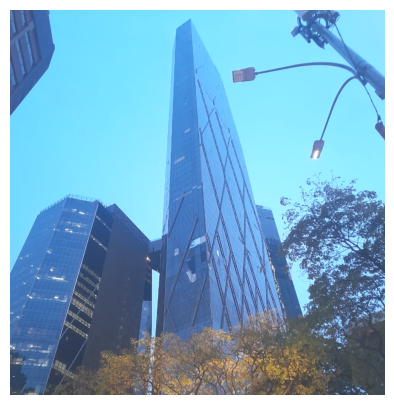

In [ ]:
# Increase the brightness of the image without changing the contrast.
I_bright = I + 0.15
I_bright = np.clip(I_bright, 0, 1)

### Write a code to display the I_bright -
plt.figure(figsize=(5, 5))
plt.imshow(I_bright)
plt.axis("off");
### Code ends

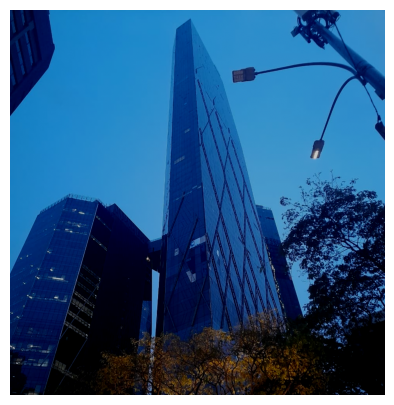

In [ ]:
# Decrease the brightness of the image without changing the contrast.
I_dark = I - 0.2
# Save the resulting image in I_dark.
I_dark = np.clip(I_dark, 0, 1)

### Write a code to display the I_dark -
plt.figure(figsize=(5, 5))
plt.imshow(I_dark)
plt.axis("off");
### Code ends

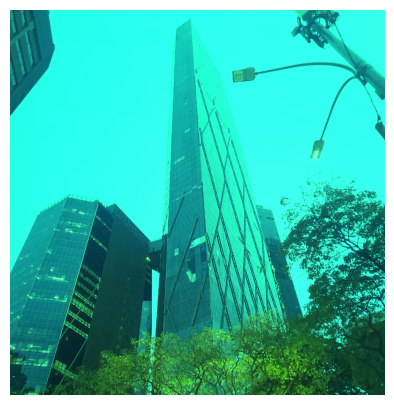

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
red_multiplier = .5
green_multiplier = 1.75
blue_multiplier = 0.95

I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = I[:, :, 0] * red_multiplier
I_tint[:, :, 1] = I[:, :, 1] * green_multiplier
I_tint[:, :, 2] = I[:, :, 2] * blue_multiplier

I_tint = np.clip(I_tint, 0, 1)

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### Write a code to display the I_tint -
plt.figure(figsize=(5, 5))
plt.imshow(I_tint)
plt.axis("off");

### Code ends

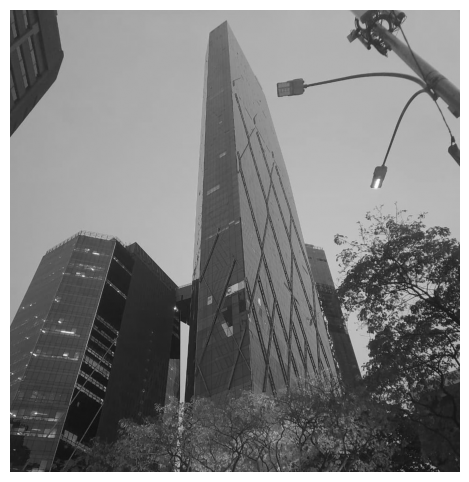

In [ ]:
# Convert the image into a grayscale image.
I_gray = color.rgb2gray(I)
# Save it to I_gray and display it
I_gray = np.clip(I_gray, 0, 1)

### Write a code to display the I_gray -
plt.imshow(I_gray, cmap = 'grey')
plt.axis("off");
### Code ends

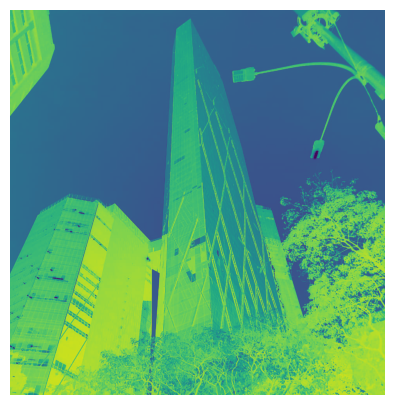

In [ ]:
# Display the negative of the grayscale image
I_neg = 1 - I_gray

### Write a code to display the I_neg -
plt.figure(figsize=(5, 5))
plt.imshow(I_neg)
plt.axis("off");
### Code ends

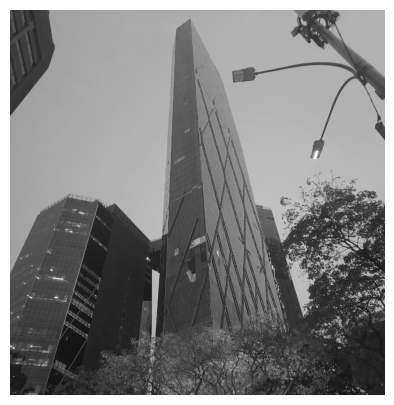

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lab-3-codes

# I_degraded = None
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))

plt.figure(figsize=(5, 5))
plt.imshow(I_degraded, cmap='gray')
plt.axis("off");
### END SOLUTION

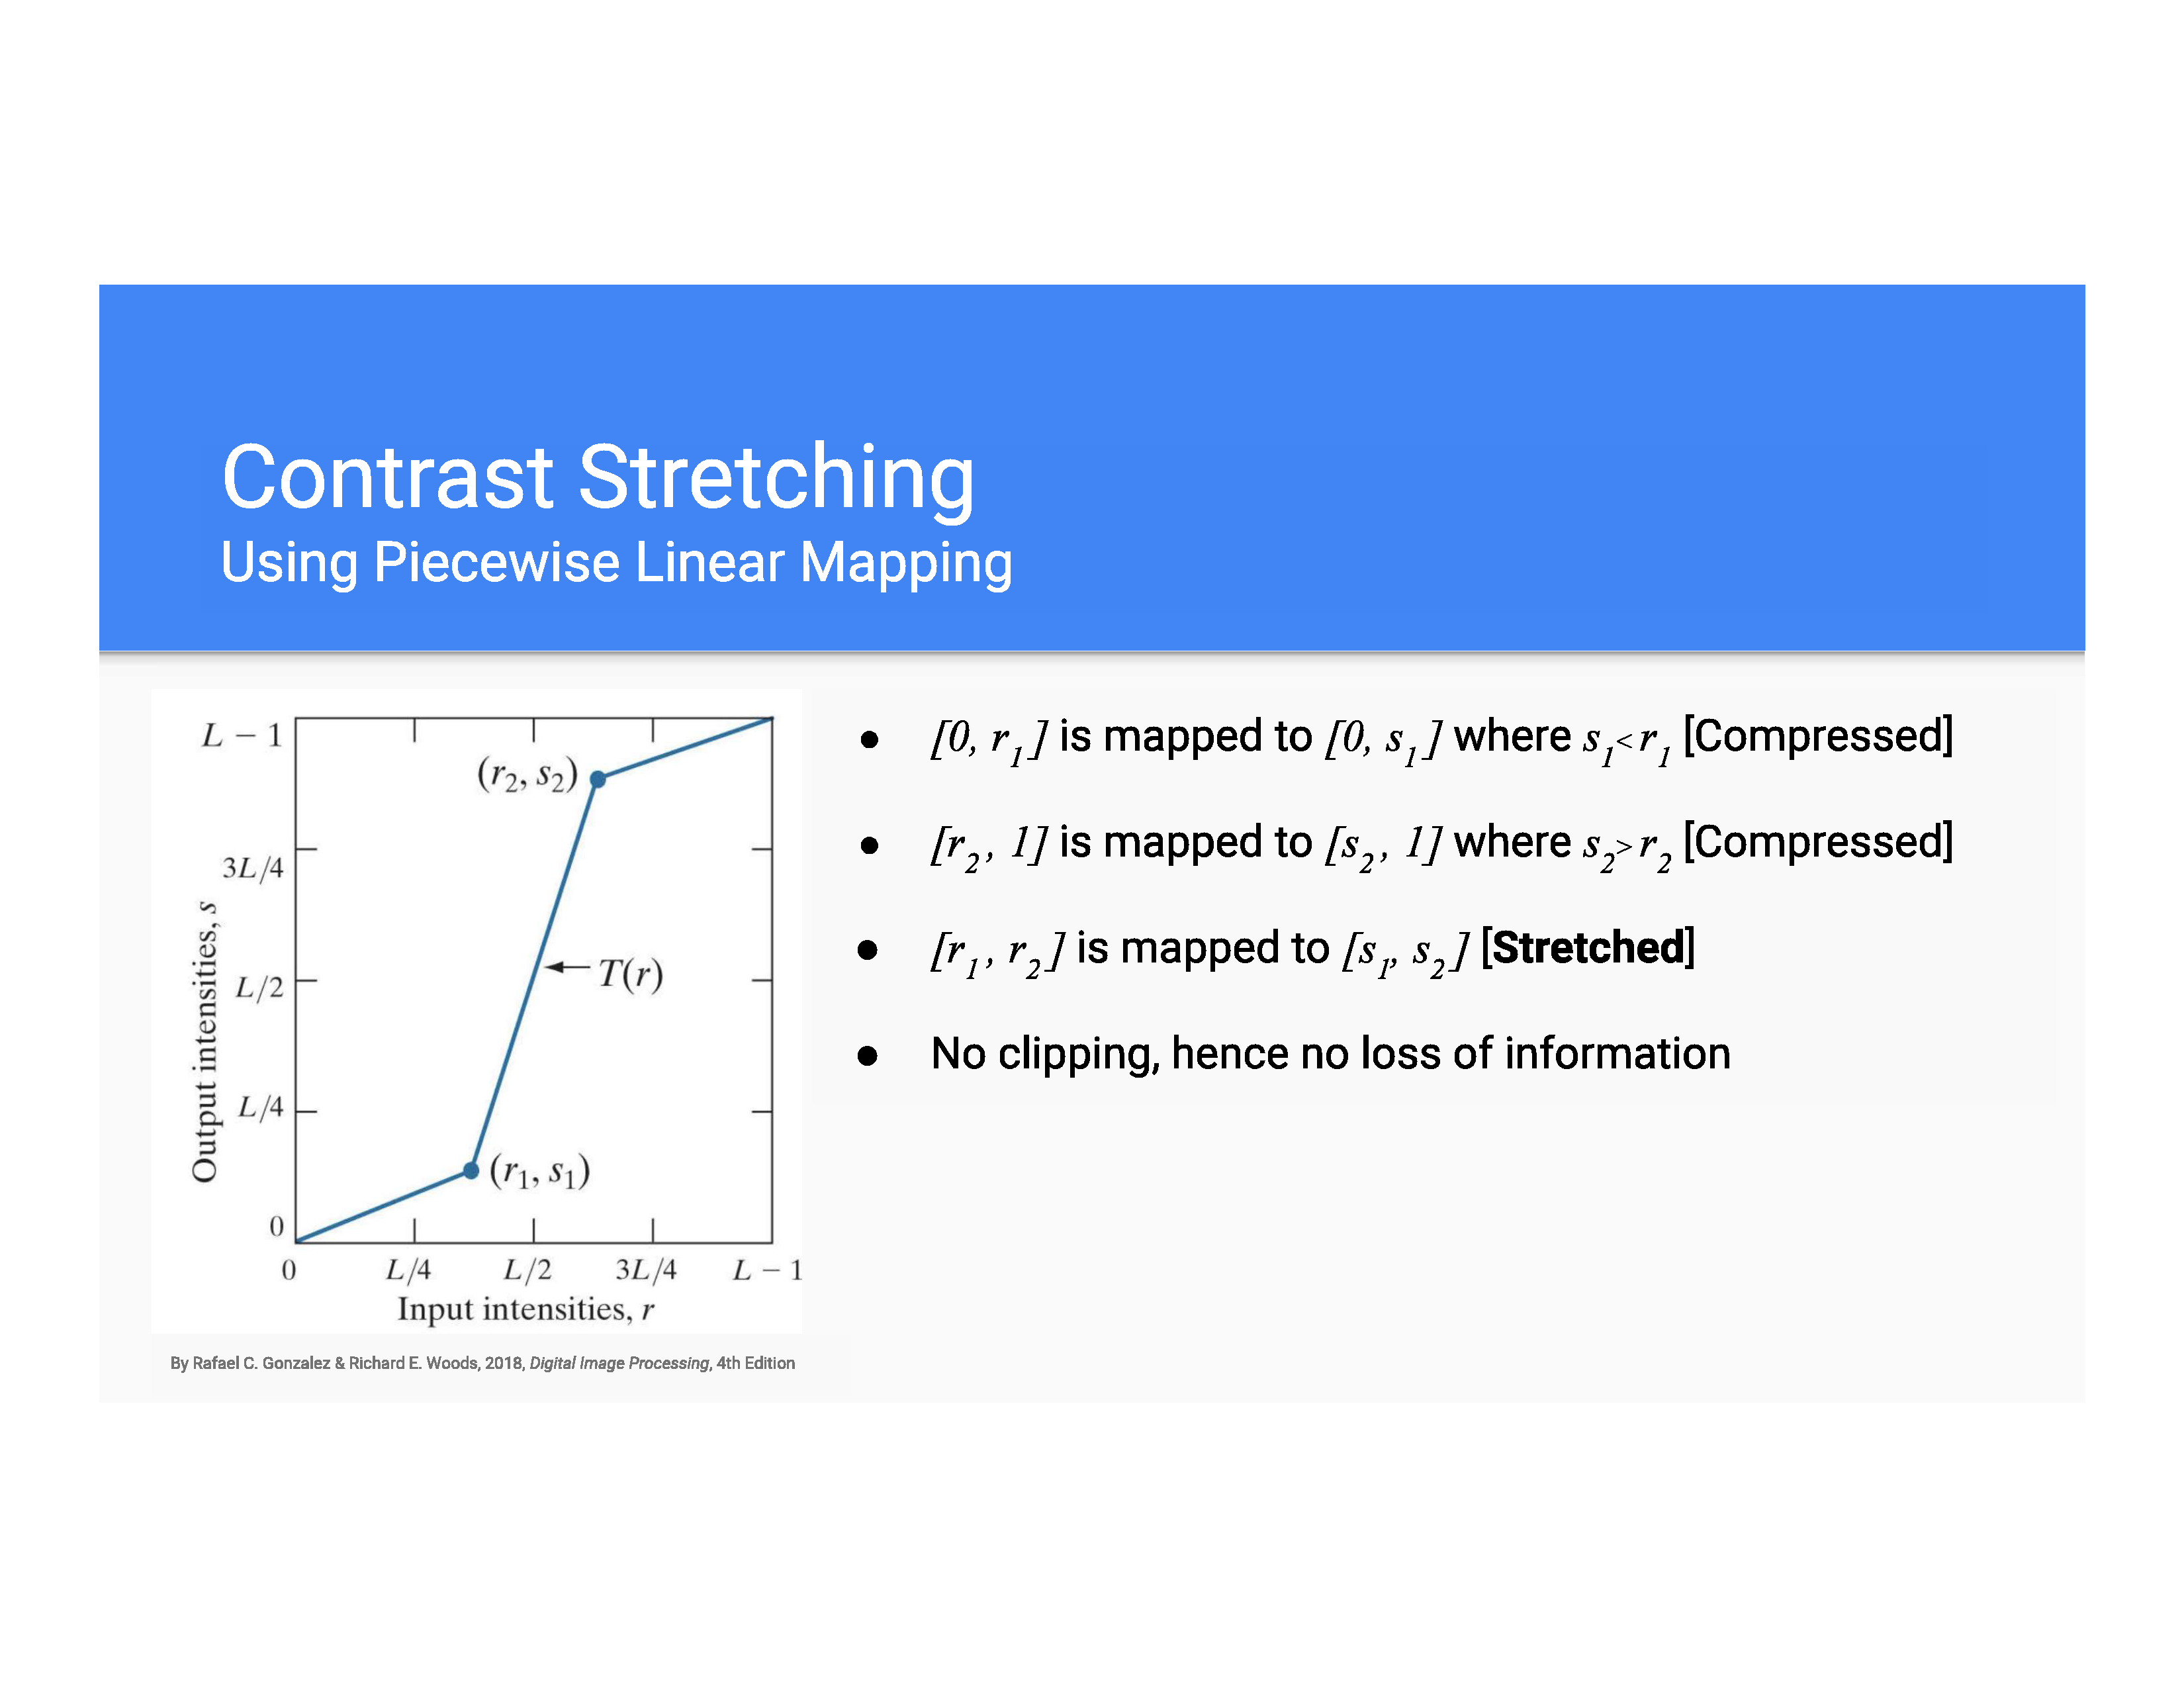

In [ ]:
def piecewise_contrast_stretch(I, r1, r2, s1, s2):

    I_stretched = np.zeros_like(I)

    mask1 = I <= r1

    if r1 == 0:

        I_stretched[mask1] = s1
    else:
        I_stretched[mask1] = (s1 / r1) * I[mask1]


    mask2 = (I > r1) & (I <= r2)
    if r2 == r1:

        I_stretched[mask2] = s1
    else:
        I_stretched[mask2] = s1 + ((s2 - s1) / (r2 - r1)) * (I[mask2] - r1)

    # Third segment: r2 to 1
    mask3 = I > r2
    if 1 == r2:

        I_stretched[mask3] = s2
    else:
        I_stretched[mask3] = s2 + ((1 - s2) / (1 - r2)) * (I[mask3] - r2)


    I_stretched = np.clip(I_stretched, 0, 1)

    return I_stretched

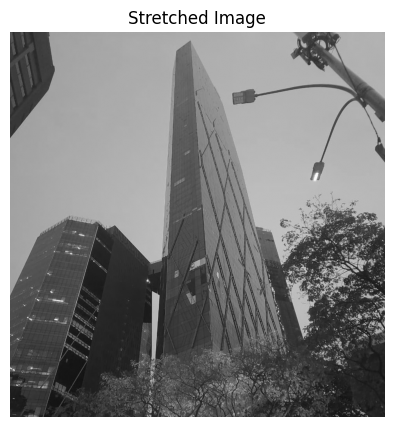

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade to fix it
# To recover the image degraded from [0,1] to [0.3, 0.6], we need to stretch [0.3, 0.6] back to [0,1].
r1 = 0.3
r2 = 0.6
s1 = 0.0
s2 = 1.0

I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

### Write a code to display the I_stretched -
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(I_stretched, cmap='gray')
plt.title('Stretched Image')
plt.axis("off");

### Code ends

## Task 2 - Histogram and Equalization

Text(0.5, 1.0, 'Blue')

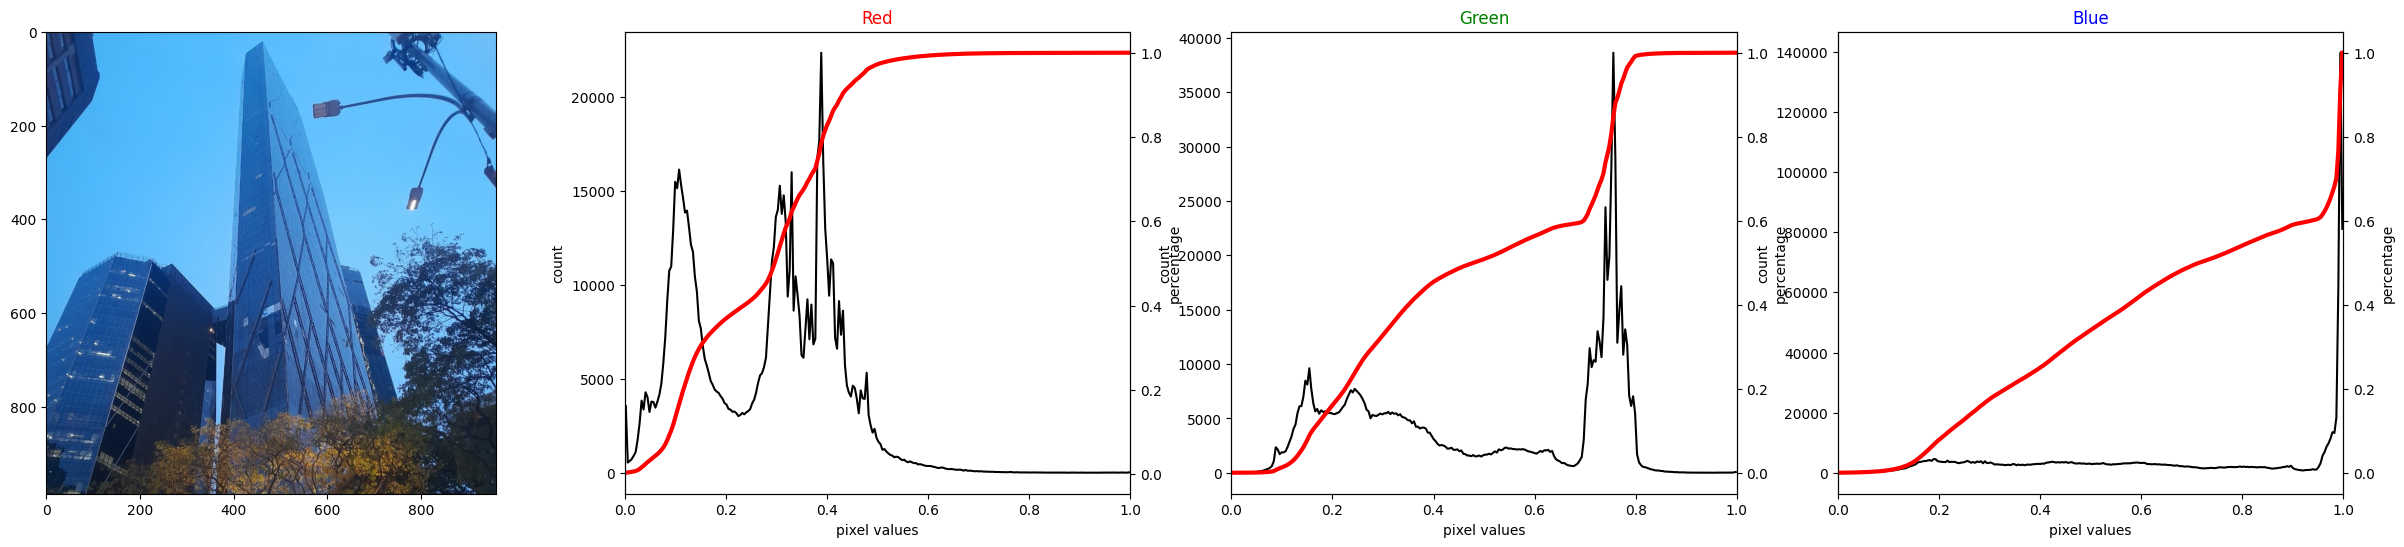

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 4, 1)
plt.imshow(I)
plt.subplot(1, 4, 2)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

/tmp/ipython-input-406374850.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


Text(0.5, 1.0, 'Grayscale Image I_gray')

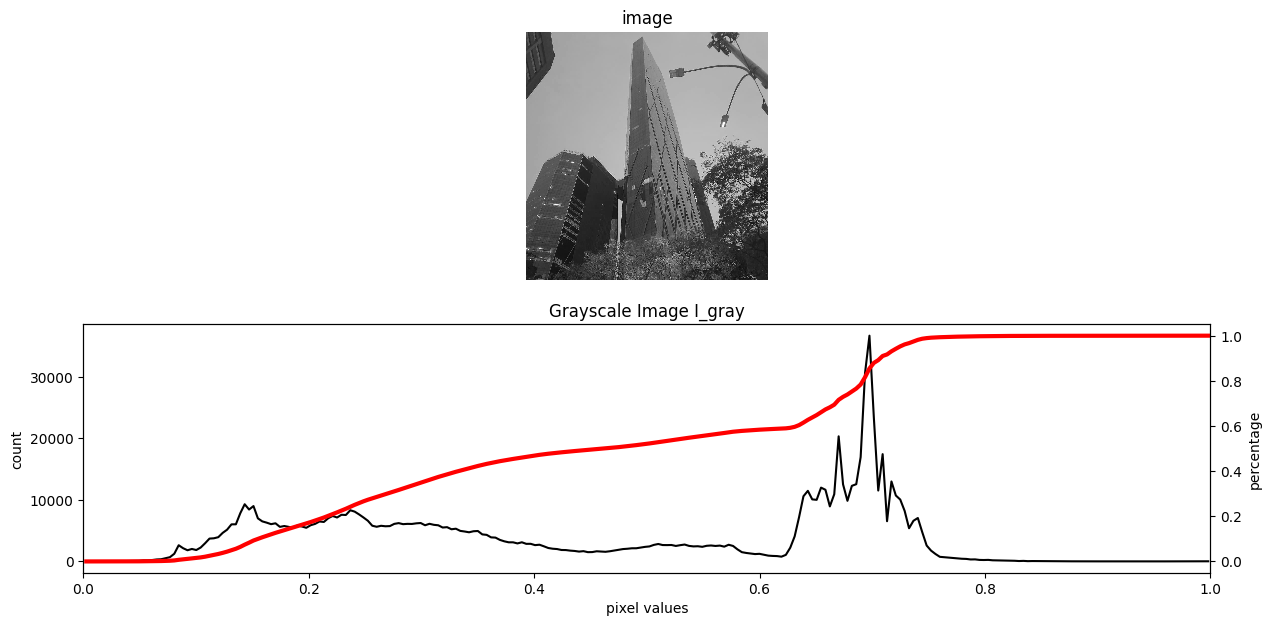

In [ ]:
# Plot the grayscale image, I_gray, and its histogram + cdf


### Begin solution
plot_img_and_hist(I_gray)
plt.title('Grayscale Image I_gray')
### End solution

/tmp/ipython-input-406374850.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


Text(0.5, 1.0, 'Degraded Image I_degraded')

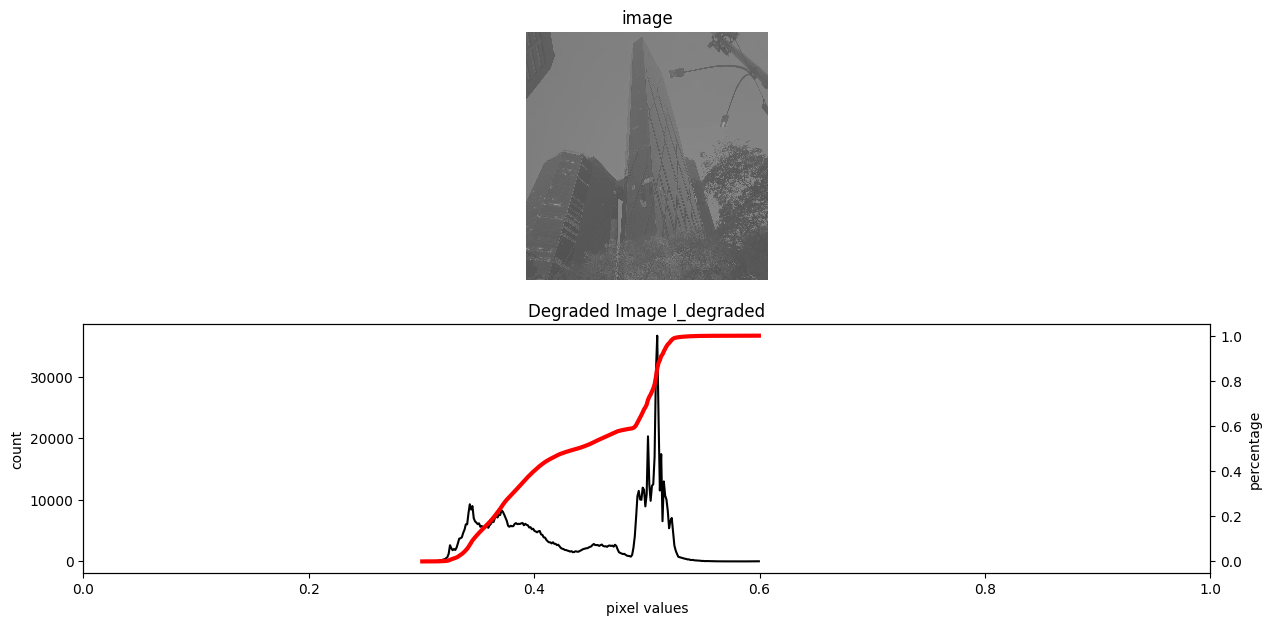

In [ ]:
# Plot the degraded image, I_degraded, and its histogram + cdf
plot_img_and_hist(I_degraded)
plt.title('Degraded Image I_degraded')

/tmp/ipython-input-406374850.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


Text(0.5, 1.0, 'HE of Degraded')

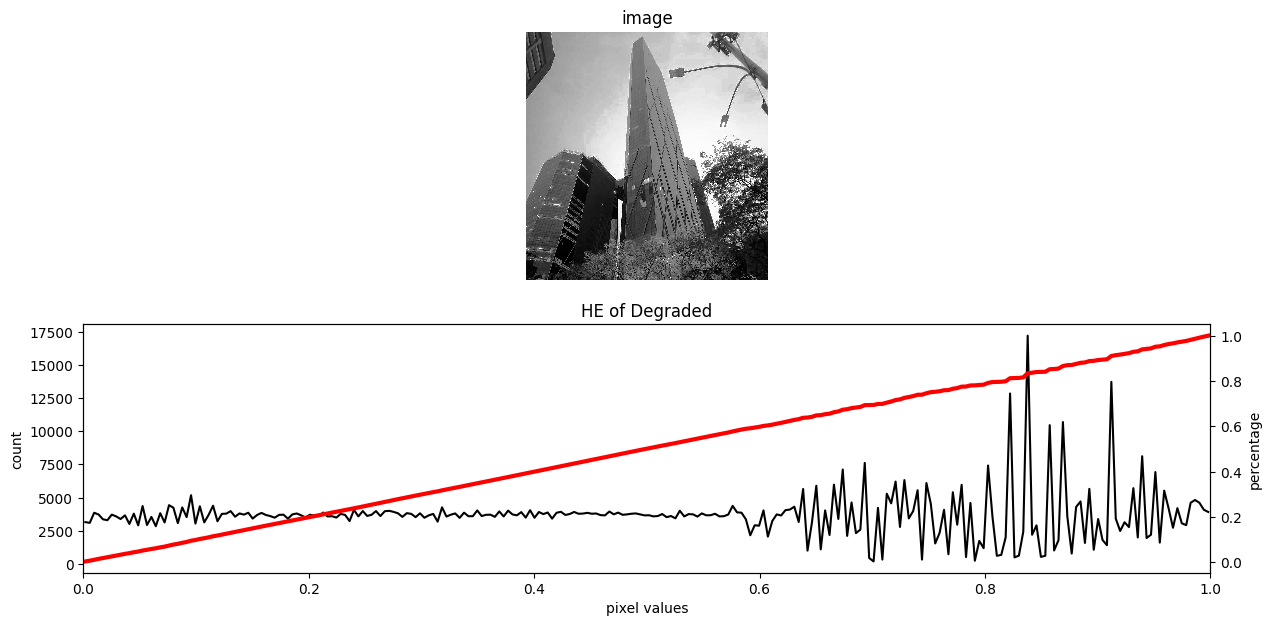

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray
I_recon_gray = exposure.equalize_hist(I_degraded)

### Write a code to display the I_recon_gray along with its histogram + CDF -
plot_img_and_hist(I_recon_gray)
plt.title('HE of Degraded')

### Code ends

/tmp/ipython-input-406374850.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


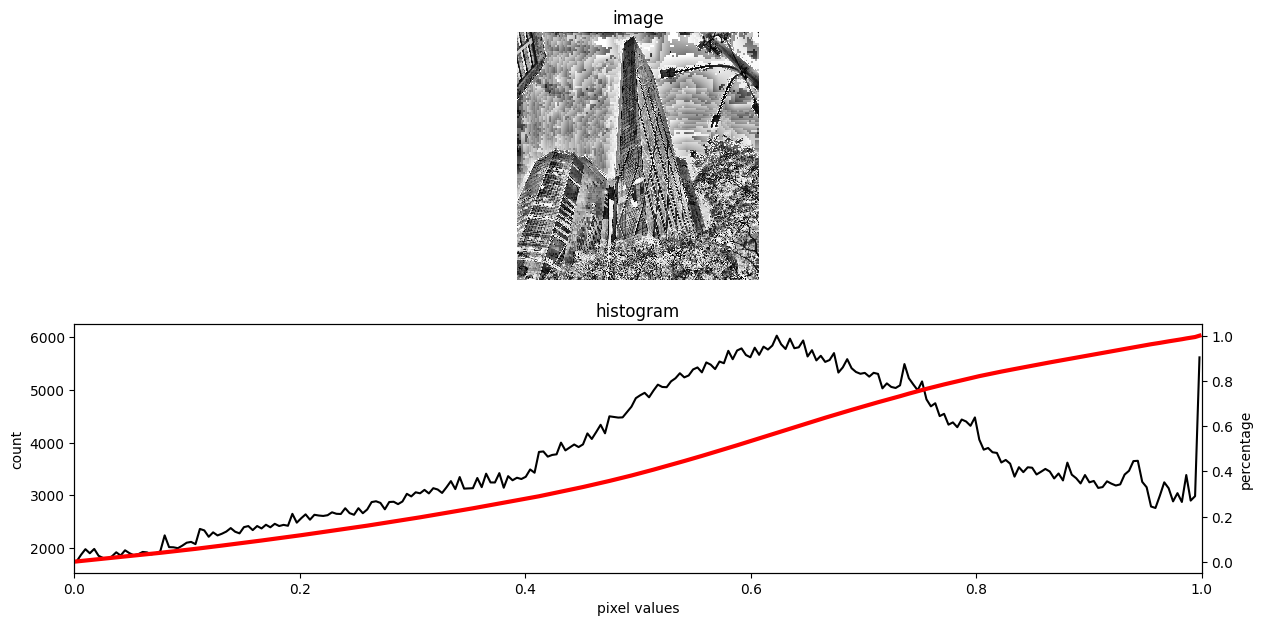

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(64, 64), clip_limit=0)

### Write a code to display the I_recon_gray_2 along with its histogram + CDF -
plot_img_and_hist(I_recon_gray_2)

### Code ends

/tmp/ipython-input-406374850.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


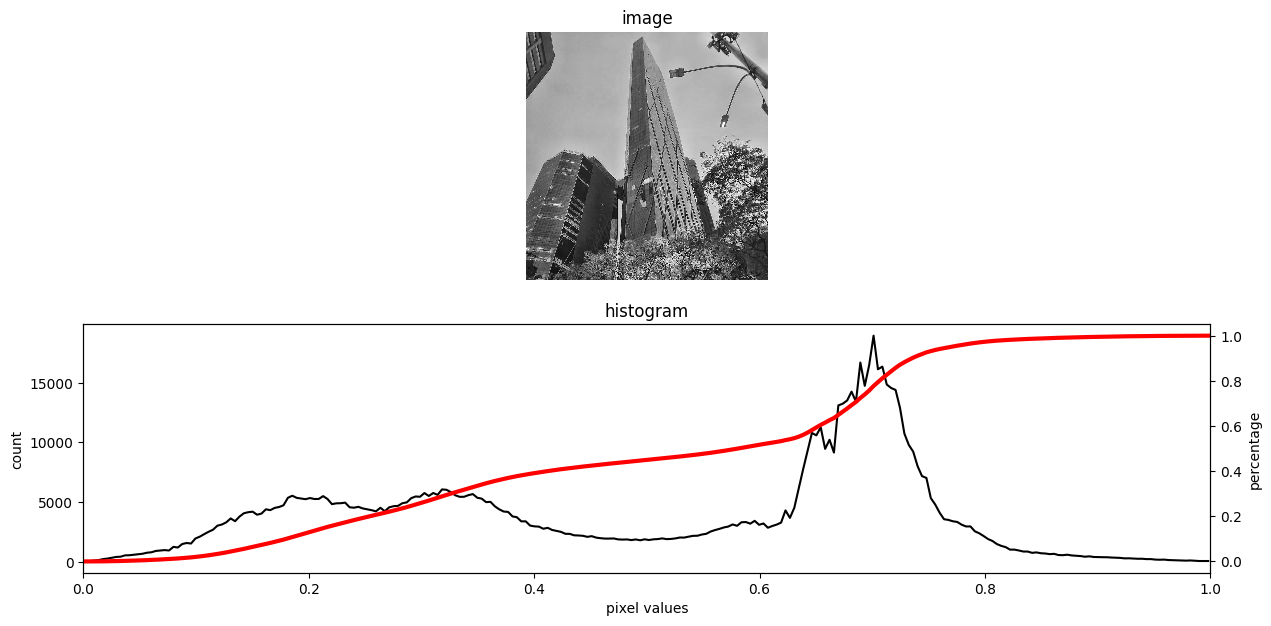

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_3
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(64, 64), clip_limit=0.01)

### Write a code to display the I_recon_gray_3 along with its histogram + CDF -
plot_img_and_hist(I_recon_gray_3)
### Code ends

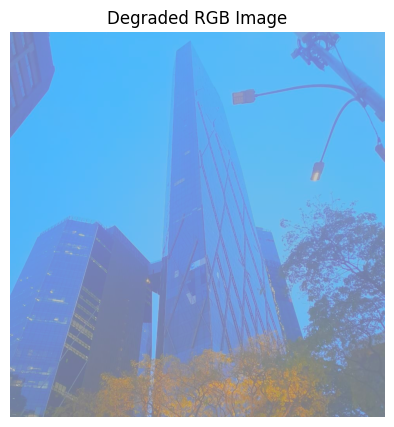

In [ ]:
Ilab = color.rgb2lab(I)

L_channel = Ilab[:, :, 0]

L_degraded = exposure.rescale_intensity(L_channel, in_range=(0, 100), out_range=(50, 80))

I_lab_degraded = Ilab.copy()
I_lab_degraded[:, :, 0] = L_degraded

I_rgb_degraded = color.lab2rgb(I_lab_degraded)

# Display the degraded RGB image
plt.figure(figsize=(5, 5))
plt.imshow(I_rgb_degraded)
plt.title('Degraded RGB Image')
plt.axis("off");

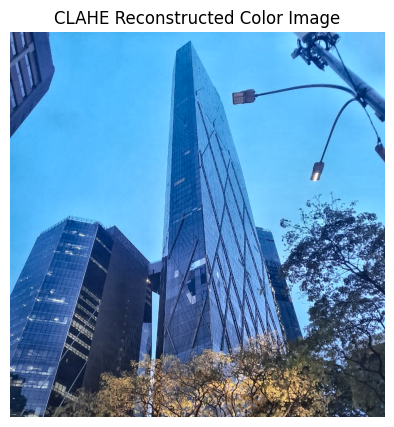

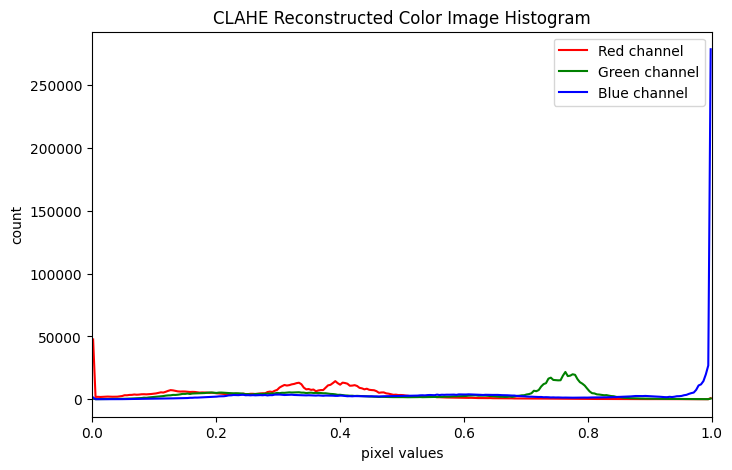

In [ ]:

I_degraded_lab = color.rgb2lab(I_rgb_degraded)


L_degraded_normalized = I_degraded_lab[:, :, 0] / 100.0

L_recon_clahe_normalized = exposure.equalize_adapthist(
    L_degraded_normalized,
    kernel_size=(64, 64),
    clip_limit=0.01
)


L_recon_clahe_scaled = L_recon_clahe_normalized * 100.0


I_recon_lab = I_degraded_lab.copy()
I_recon_lab[:, :, 0] = L_recon_clahe_scaled


I_recon_color = color.lab2rgb(I_recon_lab)


plt.figure(figsize=(5, 5))
plt.imshow(I_recon_color)
plt.title('CLAHE Reconstructed Color Image')
plt.axis("off")
plt.show()


plot_hist_color(I_recon_color, nbins=256, normalize=False)
plt.title('CLAHE Reconstructed Color Image Histogram')
plt.show()

## Task 3 - Recovering QR code

You have been provided a badly damaged QR code - https://drive.google.com/file/d/1e_ESpQ88tYx01mwVCC2O2hCvRwsPu3KN/view?usp=sharing

Your task is to recover it. Apply global histogram equalization, AHE and CLAHE on the image and see if you can read any version of the image.

❗For AHE and CLAHE, do not use a kernel size greater than 64.❗

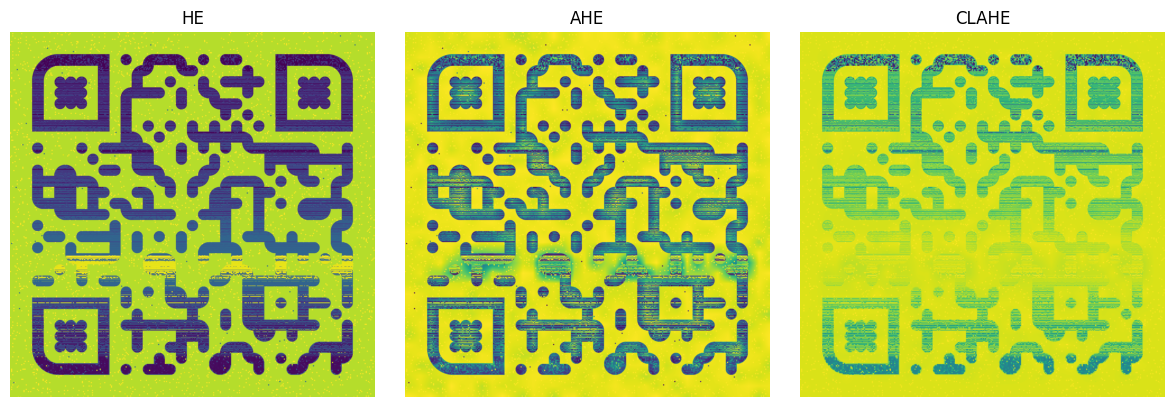

In [ ]:
I = io.imread("/content/QR_code.png")

# Convert to LAB
I_lab = color.rgb2lab(I)


# print(I_lab[:, :, 2].min())
# print(I_lab[:, :, 2].max())

I_lab[:, :, 0] = I_lab[:, :, 0]/100
I_histeq = exposure.equalize_hist(I_lab[:, :, 0])
I_ahe= exposure.equalize_adapthist(I_lab[:, :, 0], kernel_size=(64, 64), clip_limit=0)
I_clahe = exposure.equalize_adapthist(I_lab[:, :, 0], kernel_size=(64, 64), clip_limit=0.01)

# plot_img_and_hist(I_lab[:, :, 0])

# plot_img_and_hist(I_histeq)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(I_histeq)
plt.title("HE")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(I_ahe) #cmap = 'gray')
plt.title("AHE")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(I_clahe)
plt.title("CLAHE")
plt.axis("off")

plt.tight_layout()
plt.show()

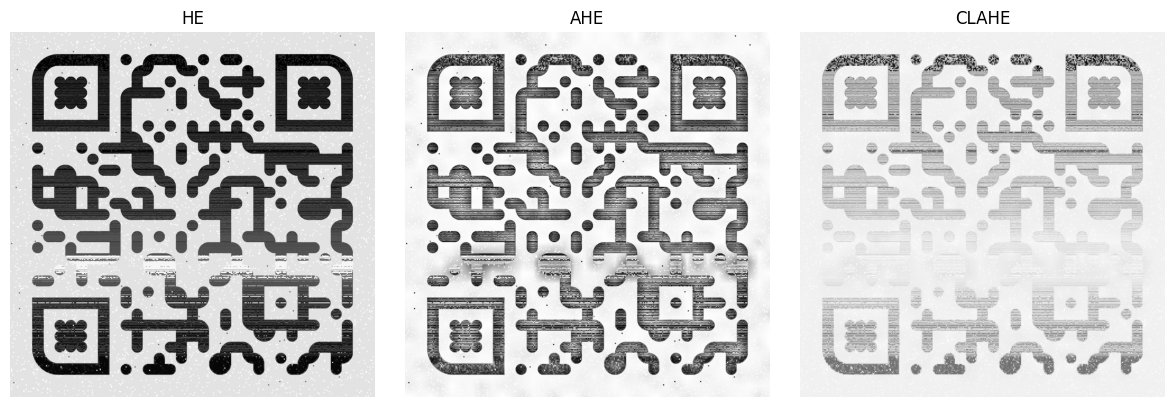

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(I_histeq, cmap = 'gray')
plt.title("HE")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(I_ahe, cmap = 'gray')
plt.title("AHE")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(I_clahe, cmap = 'gray')
plt.title("CLAHE")
plt.axis("off")

plt.tight_layout()
plt.show()

**Q1. Enter the link embedded in the QR code (if needed do a separate plot of each processed image) -**

*Answer - https://www.youtube.com/shorts/7fTHD07Q9Pw

**Q2. Which method(s) worked for you?**

*Answer -Histogram Equalization worked for me the most.

**Q3. Why do you think the method(s) worked? Or why did the other method(s) fail to work?**

*Answer -* HE worked for me the most because it enhanced the global contrast uniformly, but in the case of AHE, it increased noise and produced uneven contrast across the image. If we talk about CLAHE, it certainly reduce the noise compared to AHE but contrast enhancement become too limited. That is why , in this case HE worked the most.

# **Part 2 [15 Marks]**

In this part of the assignment, you will work with filters.

In [ ]:
import time
from scipy import signal
import matplotlib.pyplot as plt
### If you need other dependencies import here -

### Code ends

## Task 1 - Correlation vs Convolution

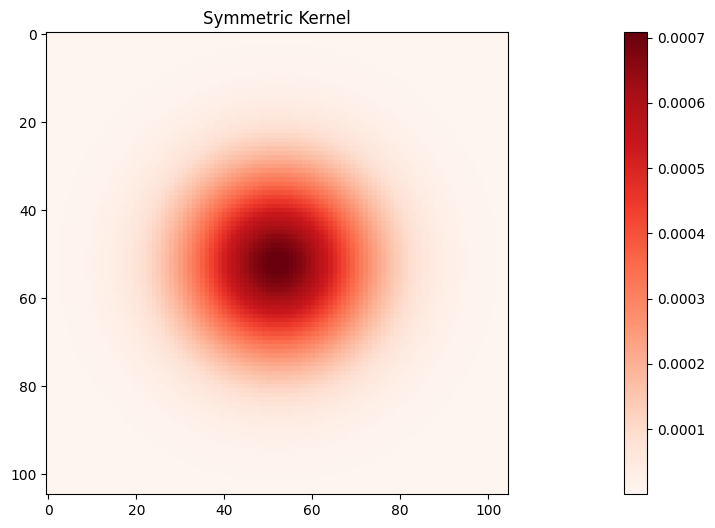

In [ ]:
# Define any symmetric kernel of size (105, 105)
import numpy as np

kernel_symmetric = np.outer(signal.windows.gaussian(105, 15), signal.windows.gaussian(105, 15))
kernel_symmetric = kernel_symmetric / np.sum(kernel_symmetric)

### Write a code to display the kernel -
plt.imshow(kernel_symmetric, cmap='Reds')
plt.title('Symmetric Kernel')
plt.colorbar()
plt.show()

### Code ends

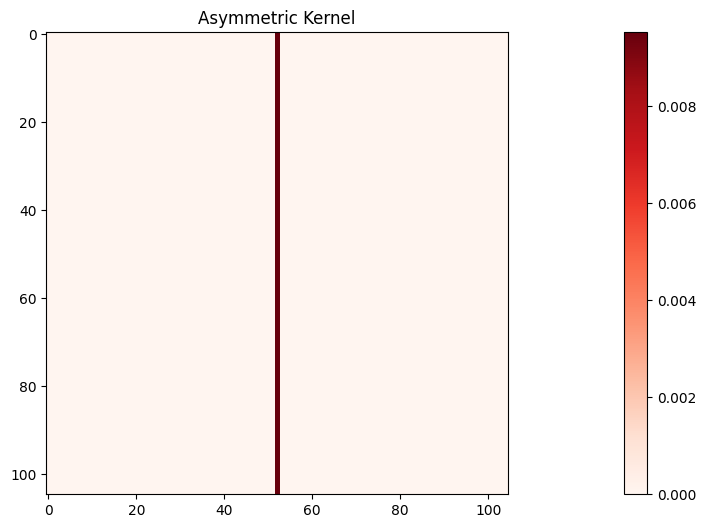

In [ ]:
# Define any asymmetric kernel of size (105, 105)
kernel_asymmetric = np.zeros((105, 105))
kernel_asymmetric[:, 52] = 1  # Vertical line (asymmetric)
kernel_asymmetric = kernel_asymmetric / np.sum(kernel_asymmetric)

### Write a code to display the kernel -
plt.imshow(kernel_asymmetric, cmap='Reds')
plt.title('Asymmetric Kernel')
plt.colorbar()
plt.show()

### Code ends

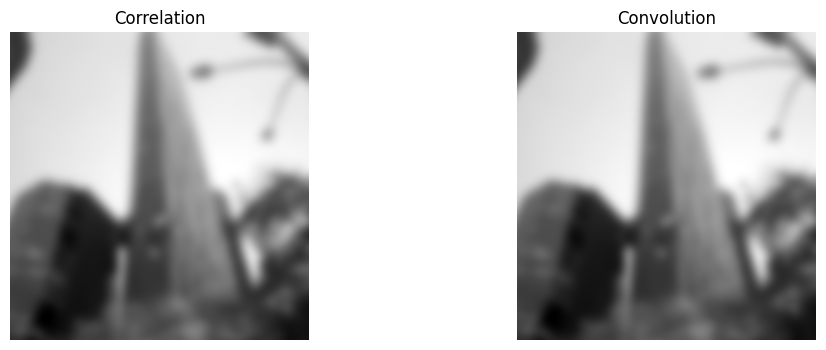

In [ ]:
# Filter the image with the symmetric kernel

# Filter using correlation
filtered_image_symmetric_corr = signal.correlate(I_gray, kernel_symmetric,mode='valid')

# Filter using convolution
filtered_image_symmetric_conv = signal.convolve(I_gray, kernel_symmetric, mode='valid')

### Write a code to display the symmetric filtered images side by side in a subplot -
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(filtered_image_symmetric_corr, cmap='gray')
plt.title('Correlation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_symmetric_conv, cmap='gray')
plt.title('Convolution')
plt.axis('off')
plt.show()

### Code ends

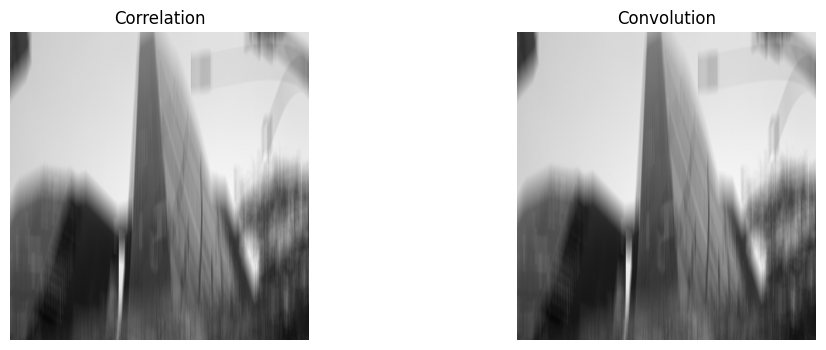

In [ ]:
# Filter the image with the asymmetric kernel

# Filter using correlation
filtered_image_asymmetric_corr = signal.correlate(I_gray, kernel_asymmetric,mode='valid')

# Filter using convolution
filtered_image_asymmetric_conv = signal.convolve(I_gray, kernel_asymmetric, mode='valid')

### Write a code to display the asymmetric filtered images side by side in a subplot -
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(filtered_image_asymmetric_corr, cmap='gray')
plt.title('Correlation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_asymmetric_conv, cmap='gray')
plt.title('Convolution')
plt.axis('off')
plt.show()
### Code ends

**Q1. Are the outputs for correlation and convolution same?**

*Answer -same for symmetric kernels, but different for asymmetric kernels.

**Q2. Provide reasoning -**

*Answer - Basically, in correlation kernel is applied to it without mofication but in the case of convulation, kernel is applied after flipping horizontally and vertically. This flippinf doesnot worked for symmetric, so both outcomes are same. but in asymmetric, flipped version differs so different outcome is showing.

## Task 2 - Finding edges

Load this image - https://drive.google.com/file/d/1MxHHPoXv0jg6SG3tKIWLAsfMncC662F6/view?usp=sharing

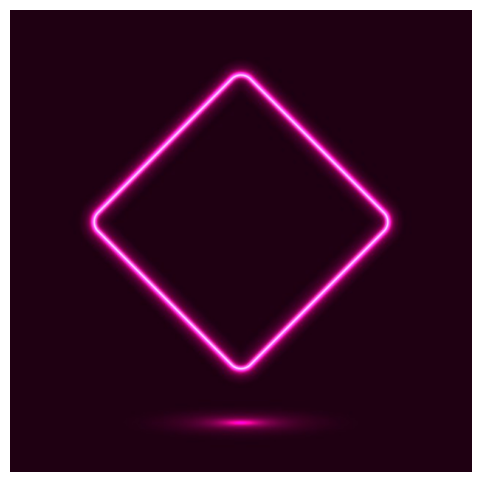

In [ ]:
# Download the image from the drive link above
# Upload it to your current working directory in colab
# Load the image and save it under I variable
I = io.imread("/content/Diamond.jpg")

### Write a code to display the image -
plt.imshow(I)
plt.axis('off')  # Hide axes
plt.show()
### Code ends

The diamond in the image has two parallel sides. You will need to come up with two $3\times3$ kernels to detect the two sets of parallel sides. Your filters should not detect all the four sides at once.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io

# Load the image
I = io.imread("/content/Diamond.jpg", as_gray=True)  # convert to grayscale for filtering

# Define the kernels
kernel_1 = np.array([[ 1/9,  1/9,  1/9],
                     [ 1/9,  1/9,  1/9],
                     [ 1/9,  1/9,  1/9]])

kernel_2 = np.array([[ 1/16,  2/16,  1/16],
                     [ 2/16,  4/16,  2/16],
                     [ 1/16,  2/16,  1/16]])



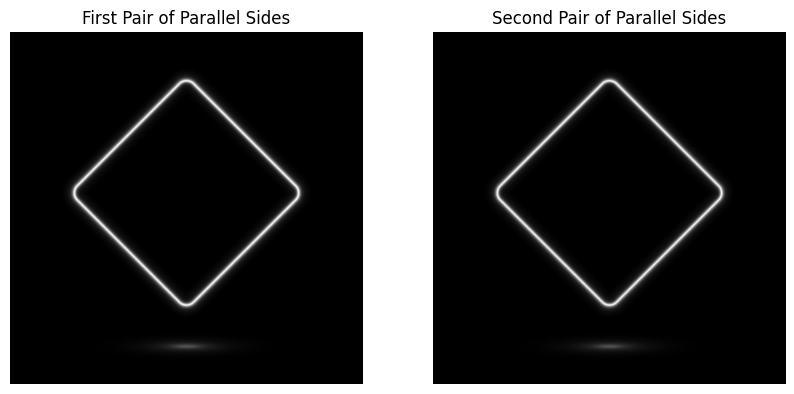

In [ ]:
# Apply kernel_1 on I and save it as first_pair
first_pair = first_pair = ndimage.convolve(I, kernel_1)

# Apply kernel_2 on I and save it as second_pair
second_pair = ndimage.convolve(I, kernel_2)

### Write a code to display the two filtered images side by side in a subplot
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(first_pair, cmap='gray')
plt.title("First Pair of Parallel Sides")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(second_pair, cmap='gray')
plt.title("Second Pair of Parallel Sides")
plt.axis('off')

plt.show()
### Code ends

**Q1. Which filters did you use and why?**

*Answer -I used box filtering and Guassian filtering .  We are using these filters because bpth are low pass filter and they reduce high frequency noise and details.

**Q2. Are your kernels unique or there can be other kernels which can accomplish the same task?**

*Answer - They are not unique; other kernels (e.g., median filtering ) is also there.